1.Check and prepare data to clean and handling missing values and ensuring consistency.
2.Summaries the data with statistical analysis: Use descriptive statistics with aggregation function (i.e sum, count, average, min, max) for searching meaningful information such as: top product sales, total amount, average amount, etc
3.Use Statistical methods to identify significant correlation/comparative/distribution/trending between variables from the data
4.Visualize the data with charts and graphs to see patterns and relationships (min.3 graph)
5.Use related python library to handle all of tasks 
6.Upload your source code with python extension file such as .py or .ipynb and file  .rawgraphs (if you visualized the data using rawgraphs)
7.Tomorrow some of you will present the result of your assignment

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('./orderdataset.csv' ,sep=';')
data.info()
# data = data.drop('order_id' ,axis = 1)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


In [3]:
# 1. Check for missing values
print("Missing values summary:")
print(data.isnull().sum())


Missing values summary:
order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64


In [4]:
# 3. Ensure consistency
# Check for duplicates
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


In [5]:
# Quantity by product id
product_categories = data.groupby('product_id')['quantity'].sum().nlargest(10)
print("Quantity by product id:")
print(product_categories)

Quantity by product id:
product_id
422879e10f46682990de24d770e7f83d    464
99a4788cb24856965c36a24e339b6058    406
389d119b48cf3043d311335e499d9c6b    285
53759a2ecddad2bb87a079a1f1519f73    275
154e7e31ebfa092203795c972e5804a6    237
368c6c730842d78016ad823897a372db    231
d5991653e037ccb7af6ed7d94246b249    228
9571759451b1d780ee7c15012ea109d4    210
7c1bd920dbdf22470b68bde975dd3ccf    181
42a2c92a0979a949ca4ea89ec5c7b934    179
Name: quantity, dtype: int64


In [6]:
# Quantity by seller id
seller_id = data.groupby('seller_id')['quantity'].sum().nlargest(10).reset_index()
print("Quantity by seller id:")
print(seller_id)

Quantity by seller id:
                          seller_id  quantity
0  1f50f920176fa81dab994f9023523100      1482
1  4a3ca9315b744ce9f8e9374361493884      1418
2  cc419e0650a3c5ba77189a1882b7556a      1257
3  6560211a19b47992c3666cc44a7e94c0      1026
4  7c67e1448b00f6e969d365cea6b010ab       993
5  cca3071e3e9bb7d12640c9fbe2301306       940
6  7a67c85e85bb2ce8582c35f2203ad736       810
7  da8622b14eb17ae2831f4ac5b9dab84a       747
8  1025f0e2d44d7041d6cf58b6550e0bfa       689
9  3d871de0142ce09b7081e2b9d1733cb1       679


In [7]:
payment_type = data.groupby('payment_type')['quantity'].sum().nlargest(10).reset_index()
print(payment_type)

      payment_type  quantity
0  virtual account     15076
1       debit card     14976
2      credit card     14936
3         e-wallet     14885


In [8]:
data['seller_id'].nunique()
# data.drop('seller_id_num' , axis = 1 , inplace = True)

# Giving unique id to seller_id , order_id , product_id , customer_id
data['order_id'], unique = pd.factorize(data['order_id'])
data['product_id'], unique = pd.factorize(data['product_id'])
data['seller_id'], unique = pd.factorize(data['seller_id'])
data['customer_id'], unique = pd.factorize(data['customer_id'])

print(data['order_id'].nunique())
print(data['product_id'].nunique())
print(data['seller_id'].nunique())
print(data['customer_id'].nunique())


42694
16866
1777
42694


In [9]:
print(data.duplicated().unique())
print(data.isnull().sum())
data.head()

[False]
order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64


,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,0,2,0,1489000,0,28000,0,shipped,05/09/2016,virtual account,fashion,1800.0
1,0,1,1,1756000,0,45000,0,shipped,05/09/2016,virtual account,automotive,1400.0
2,1,1,2,1707000,1,174000,1,canceled,05/09/2016,e-wallet,toys,700.0
3,2,1,3,3071000,2,154000,2,delivered,03/10/2016,e-wallet,utilities,300.0
4,3,1,4,3833000,3,147000,3,canceled,03/10/2016,e-wallet,fashion,500.0


In [10]:
#Order status, payment types, and product categories
print(f"Order Details : {data['order_status'].value_counts()}")
print(f"Different type of payment : {data['payment_type'].value_counts()}")
print(f"Different type of category : {data['product_category_name'].value_counts()}")


print(f"Total Amount of sales: {data['price'].sum()}")
print(f"Average sales / order: {data['price'].mean()}")

#sales per category
totalsalesCategory = data.groupby('product_category_name')['price'].sum()
print(f"Totalsales / category : {totalsalesCategory}")

#average weight of products
print(f"Average weight of product in gram: {data['product_weight_gram'].mean()}")

#maximum and minimum sales per category
print(f"Category with maximum sales is {totalsalesCategory.idxmax()} with sales of {totalsalesCategory.max()}")
print(f"Category with minimum sales is {totalsalesCategory.idxmin()} with sales of {totalsalesCategory.min()}")

#average shipping cost
print(f"Average shipping cost of an order: {data['freight_value'].mean()}")

# Top product sales by quantity with category information
top_products = data.groupby(['product_id', 'product_category_name']).size().sort_values(ascending=False).head(10)
print(f"Top 10 products by quantity sold with category information:\n{top_products}")

# Total sales amount per seller
total_sales_seller = data.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(10)
print(f"Top 10 sellers by total sales amount:\n{total_sales_seller}")

# Total quantity sold per category
total_quantity_category = data.groupby('product_category_name')['order_id'].count()
print(f"Total quantity sold per category:\n{total_quantity_category}")

# Average freight value per seller
average_freight_seller = data.groupby('seller_id')['freight_value'].mean().sort_values(ascending=False).head(10)
print(f"Average freight value per seller:\n{average_freight_seller}")

# Total sales amount per customer
total_sales_customer = data.groupby('customer_id')['price'].sum().sort_values(ascending=False).head(10)
print(f"Top 10 customers by total sales amount:\n{total_sales_customer}")

# Customer lifetime value (total sales per customer)
customer_lifetime_value = data.groupby('customer_id')['price'].sum().sort_values(ascending=False)
print(f"Customer lifetime value (total sales per customer):\n{customer_lifetime_value}")

# Median sales per order
median_sales_order = data['price'].median()
print(f"Median sales per order: {median_sales_order}")

# Sales distribution by payment type
sales_distribution_payment = data.groupby('payment_type')['price'].sum()
print(f"Sales distribution by payment type:\n{sales_distribution_payment}")

#find popular payment method
popular_payment_type = data['payment_type'].value_counts().idxmax()
print(f"Most popular payment type: {popular_payment_type}")

#find what category is most canceled
#filter it
canceled_orders = data[data['order_status'] == 'canceled']

#coutn cancel by each category
canceled_orders_per_category = canceled_orders['product_category_name'].value_counts()

#find the most canceled one
most_canceled_category = canceled_orders_per_category.idxmax()
most_canceled_count = canceled_orders_per_category.max()

print(f"Product category with the most canceled orders: {most_canceled_category}")
print(f"Number of canceled orders in this category: {most_canceled_count}")

#do the same for what category sucessfully delivered
#couny delivered by each category
delivered_orders = data[data['order_status'] == 'delivered']
delivered_orders_per_category = delivered_orders['product_category_name'].value_counts()
most_delivered_category = delivered_orders_per_category.idxmax()
most_delivered_count = delivered_orders_per_category.max()

print(f"Product category with the most successful orders: {most_delivered_category}")
print(f"Number of delivered orders in this category: {most_delivered_count}")

#find the heaviest product
heaviest_product = data.loc[data['product_weight_gram'].idxmax()]

#extract or fin d relevant information
heaviest_product_weight = heaviest_product['product_weight_gram']
heaviest_product_quantity = heaviest_product['quantity']
heaviest_product_id = heaviest_product['product_id']
heaviest_product_category = heaviest_product['product_category_name']

print(f"Heaviest product ID: {heaviest_product_id}")
print(f"Heaviest product category: {heaviest_product_category}")
print(f"Weight of the heaviest product (grams): {heaviest_product_weight}")
print(f"Quantity of the heaviest product: {heaviest_product_quantity}")

#now we find the smalles weight with the same method for the heaviest
light_product = data.loc[data['product_weight_gram'].idxmin()]

light_product_weight = light_product['product_weight_gram']
light_product_quantity = light_product['quantity']
light_product_id = light_product['product_id']
light_product_category = light_product['product_category_name']

print(f"light product ID: {light_product_id}")
print(f"light product category: {light_product_category}")
print(f"Weight of the light product (grams): {light_product_weight}")
print(f"Quantity of the light product: {light_product_quantity}")

#just to make sure the column is in datetime format
data['purchase_date'] = pd.to_datetime(data['purchase_date'], dayfirst=True)

#exxtract year and month from 'purchase_date'
data['year_month'] = data['purchase_date'].dt.to_period('M')

#group by the year and month and sum the quantities from 'quanitiy'
monthly_purchases = data.groupby('year_month')['quantity'].sum()

#find the month and year with the highest total quantity
most_purchased_month_year = monthly_purchases.idxmax()
most_purchased_quantity = monthly_purchases.max()

print(f"The month and year with the most purchased products is: {most_purchased_month_year}")
print(f"Total quantity purchased in this month: {most_purchased_quantity}")


Order Details : delivered      48664
shipped          567
processing       270
canceled         267
invoiced         221
unavailable        7
approved           3
Name: order_status, dtype: int64
Different type of payment : virtual account    12581
credit card        12498
debit card         12472
e-wallet           12448
Name: payment_type, dtype: int64
Different type of category : toys           6375
electronics    6299
automotive     6286
fashion        6274
beauty         6225
gadget         6220
sports         6192
utilities      6128
Name: product_category_name, dtype: int64
Total Amount of sales: 130386588000
Average sales / order: 2607783.9156783135
Totalsales / category : product_category_name
automotive     16493552000
beauty         16272726000
electronics    16248782000
fashion        16433729000
gadget         16063418000
sports         16222582000
toys           16604282000
utilities      16047517000
Name: price, dtype: int64
Average weight of product in gram: 2201.830892

In [11]:
# Count by order_status
order_status = data.groupby('order_status').size().nlargest(10).reset_index()
print("Count by order_status:")
print(order_status)

Count by order_status:
  order_status      0
0    delivered  48664
1      shipped    567
2   processing    270
3     canceled    267
4     invoiced    221
5  unavailable      7
6     approved      3


In [12]:
# Quantity by purchase_date
purchase_date = data.groupby('purchase_date')['quantity'].sum().nlargest(10).reset_index()
print("Quantity by purchase_date:")
print(purchase_date)

Quantity by purchase_date:
  purchase_date  quantity
0    2017-11-24      1337
1    2017-11-25      1184
2    2017-11-27       688
3    2017-11-28       563
4    2017-11-29       523
5    2017-11-26       488
6    2017-12-05       472
7    2017-08-23       466
8    2017-12-13       453
9    2017-07-17       439


In [13]:
# Correlation matrix
correlation_matrix = data[['price', 'quantity', 'freight_value', 'product_weight_gram']].corr()
print(correlation_matrix)


                        price  quantity  freight_value  product_weight_gram
price                1.000000 -0.001649       0.005095             0.002746
quantity            -0.001649  1.000000      -0.009926            -0.009247
freight_value        0.005095 -0.009926       1.000000            -0.005212
product_weight_gram  0.002746 -0.009247      -0.005212             1.000000


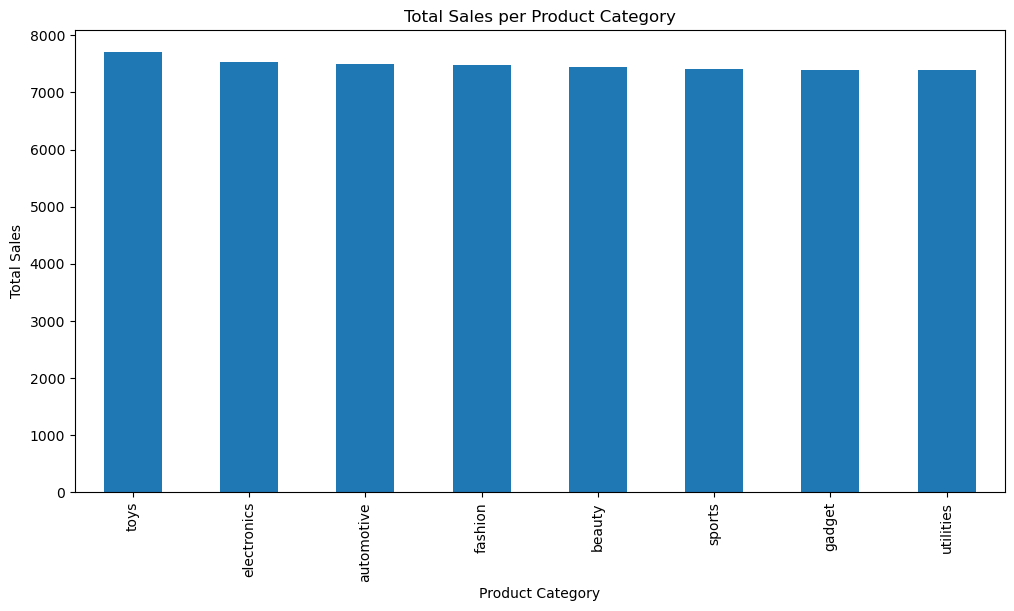

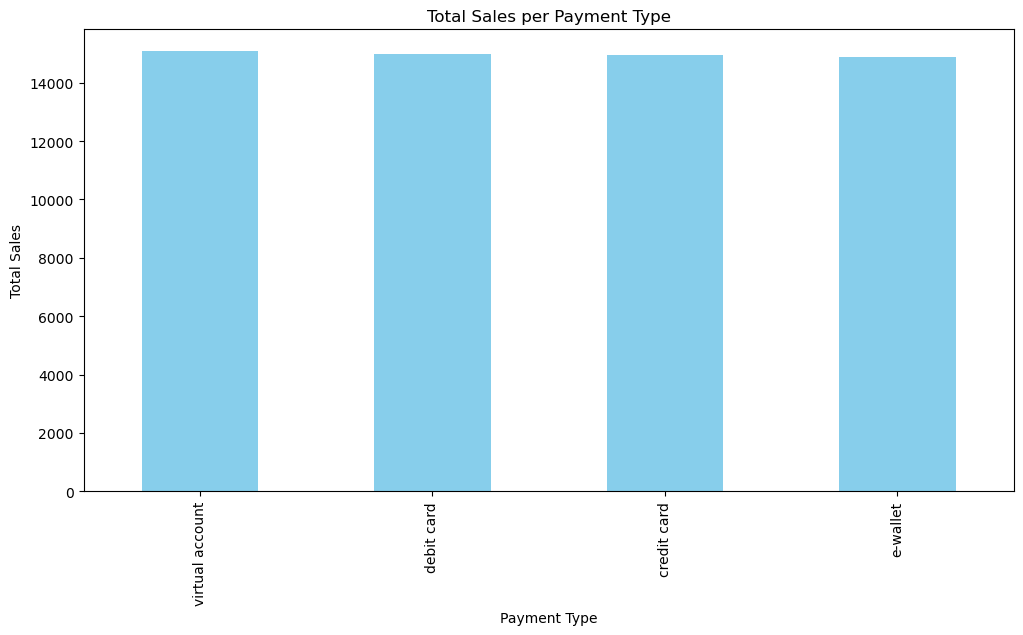

In [14]:

# Sales per category
category_sales = data.groupby('product_category_name')['quantity'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

# Sales per payment type
payment_sales = data.groupby('payment_type')['quantity'].sum().sort_values(ascending=False)
payment_sales.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Total Sales per Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Sales')
plt.show()


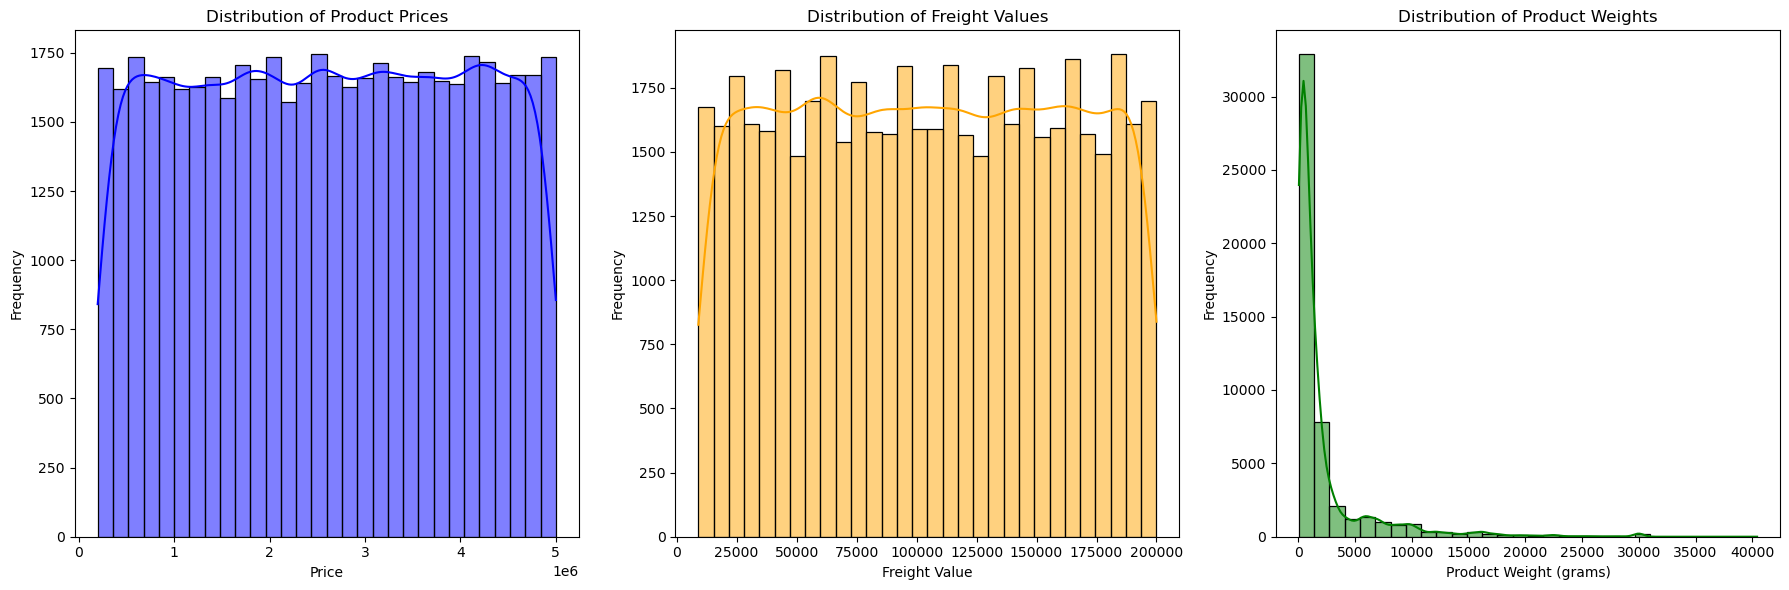

In [15]:
# Define figure size and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Distribution of Product Prices
sns.histplot(data['price'], kde=True, bins=30, ax=axs[0], color='blue')
axs[0].set_title('Distribution of Product Prices')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')

# Plot 2: Distribution of Freight Values
sns.histplot(data['freight_value'], kde=True, bins=30, ax=axs[1], color='orange')
axs[1].set_title('Distribution of Freight Values')
axs[1].set_xlabel('Freight Value')
axs[1].set_ylabel('Frequency')

# Plot 3: Distribution of Product Weights
sns.histplot(data['product_weight_gram'], kde=True, bins=30, ax=axs[2], color='green')
axs[2].set_title('Distribution of Product Weights')
axs[2].set_xlabel('Product Weight (grams)')
axs[2].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

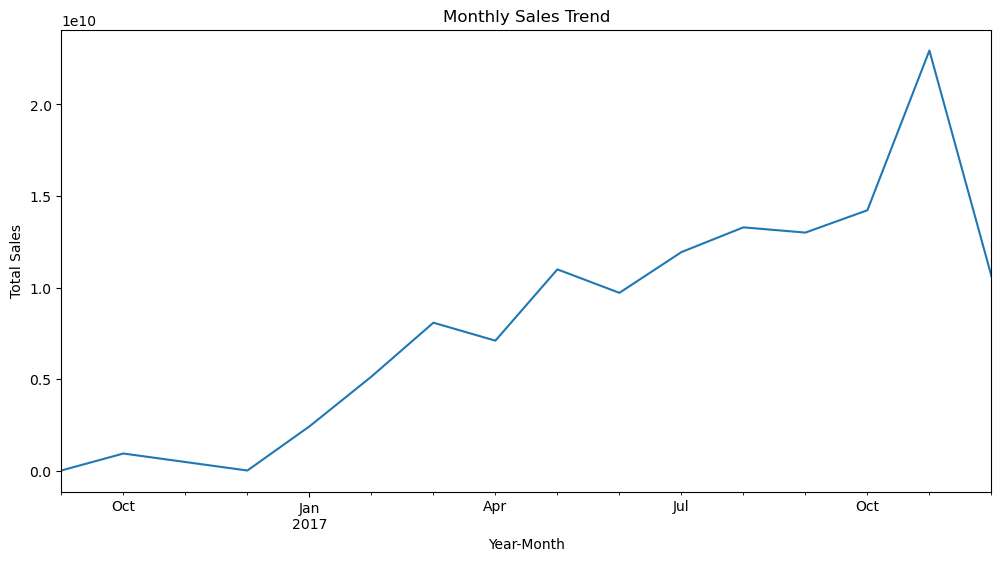

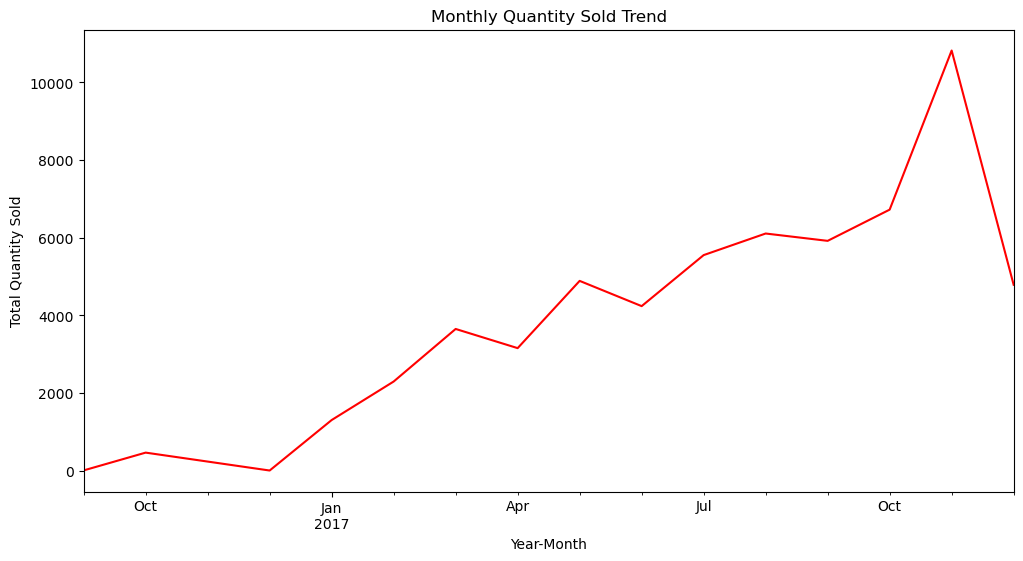

In [16]:
# Ensure 'purchase_date' is in datetime format
data['purchase_date'] = pd.to_datetime(data['purchase_date'], dayfirst=True)

# Extract year and month
data['year_month'] = data['purchase_date'].dt.to_period('M')

# Monthly sales
monthly_sales = data.groupby('year_month')['price'].sum()
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

# Monthly quantity sold
monthly_quantity = data.groupby('year_month')['quantity'].sum()
monthly_quantity.plot(kind='line', figsize=(12, 6), color='red')
plt.title('Monthly Quantity Sold Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.show()


In [17]:
# Summary statistics
summary_stats = data[['price', 'quantity', 'freight_value', 'product_weight_gram']].describe()
print(summary_stats)


              price      quantity  freight_value  product_weight_gram
count  4.999900e+04  49999.000000   49999.000000         49980.000000
mean   2.607784e+06      1.197484  104521.390428          2201.830892
std    1.388312e+06      0.722262   55179.844962          3929.896875
min    2.000000e+05      1.000000    9000.000000            50.000000
25%    1.410500e+06      1.000000   57000.000000           300.000000
50%    2.610000e+06      1.000000  104000.000000           800.000000
75%    3.810000e+06      1.000000  152000.000000          1850.000000
max    5.000000e+06     21.000000  200000.000000         40425.000000
